#### Importing necessary libraries

In [ ]:
import sklearn  # General import (rarely used alone)
# Import a Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
# For data splitting
from sklearn.model_selection import train_test_split
# For preprocessing
from sklearn.preprocessing import StandardScaler
# For pipelining the preprocessor and the model
from sklearn.pipeline import Pipeline
# For test train split and cross validation and checking for all values of parameters to get the best
from sklearn.model_selection import GridSearchCV
# For metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_squared_error
# For the dataset 
from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### Basic code to predict using sklearn

In [36]:
# Sample Data
X = np.random.randn(100,7) # Feautres
Y = np.random.randint(1,101,(100))

# Split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train,y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Evaluate the model
print("Predictions : ",y_pred)
print("MSE : ",mean_squared_error(y_test,y_pred))

Predictions :  [52.71260665 56.41810872 53.81030073 75.82757915 56.61192302 60.20158462
 61.2546636  40.84120887 56.69561643 51.60136848 51.19716846 52.84127013
 36.29610899 62.78053328 56.30748519 55.54006831 55.26928786 57.53582789
 54.77280051 61.07807404]
MSE :  1123.927015341465


## Introduction to Scikit-Learn

In [37]:
X,y = fetch_california_housing(return_X_y=True) # Arrays X and Y(The prices of the house) are returned
# Model Creation and Training
model = KNeighborsRegressor() # creation if pipeline is not used

# Pipelining the preprocessor and the model --> Pipeline can also be used to fit and predict
pipe = Pipeline([("scale",StandardScaler()),("model",KNeighborsRegressor())])
print(pipe.get_params()) # To see parameters of an object

{'memory': None, 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())], 'verbose': False, 'scale': StandardScaler(), 'model': KNeighborsRegressor(), 'scale__copy': True, 'scale__with_mean': True, 'scale__with_std': True, 'model__algorithm': 'auto', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__metric_params': None, 'model__n_jobs': None, 'model__n_neighbors': 5, 'model__p': 2, 'model__weights': 'uniform'}


In [38]:
# GridSearchCV 
model = GridSearchCV(estimator=pipe, # The estimator must have .fit and .predict methods
             param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},  # parameters of the estimator that you want to check and thier values
             cv=3)  # cv is the cross validation parameters here 3 folds are made
model.fit(X,y) # Training

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [39]:
pred = model.predict(X) # Prediction
pd.DataFrame(model.cv_results_) # The results of the grid search are transfered to a pandas dataFrame

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023675,0.012984,0.224262,0.017173,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.017047,0.002419,0.276668,0.037177,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.015182,0.001642,0.255910,0.021787,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.015044,0.001049,0.290968,0.018396,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.014675,0.000934,0.300288,0.014447,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.014011,0.000017,0.305482,0.026106,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.015330,0.001140,0.345836,0.051451,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.014124,0.001161,0.361743,0.069517,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.017996,0.004320,0.334668,0.036808,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.015125,0.000858,0.349524,0.017876,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


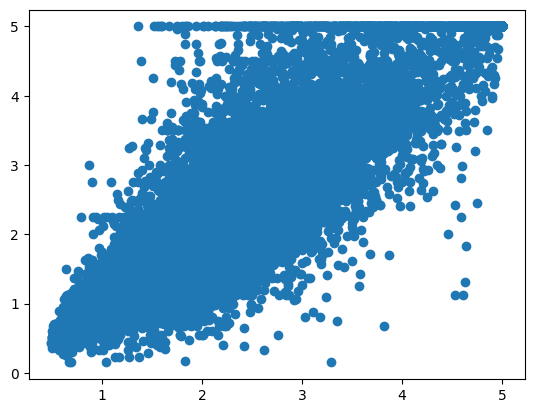

In [40]:
plt.scatter(pred,y)

In [41]:
# Decription of the dataset used
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## PreProcessing

In [42]:
df = pd.read_csv('drawndata1.csv')
df.head(3)

,x,y,z
0,3745.401188,0.031429,b
1,9507.143064,0.636410,b
2,7319.939418,0.314356,a


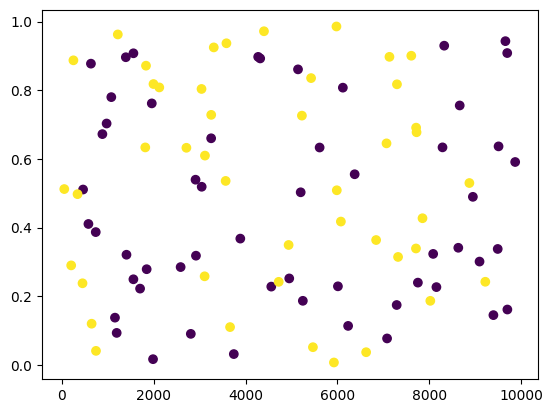

In [43]:
X = df[['x','y']].values
Y = df['z']=='a'
plt.scatter(X[:,0],X[:,1],c=Y)

#### Scaling

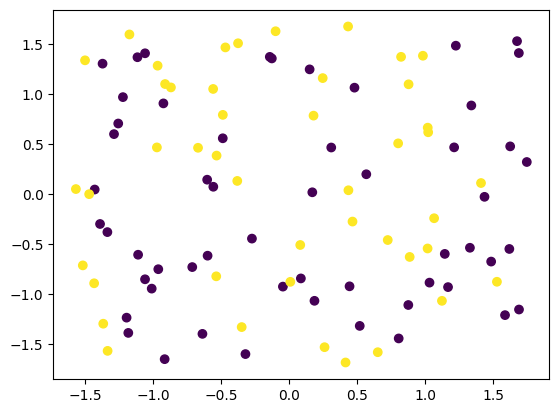

In [44]:
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:,0],X_new[:,1],c=Y)

Now the Scale of both the axes is similar the spread is also same . Nothing happened to the positions of outliers

#### Weakness of Standard Scaler

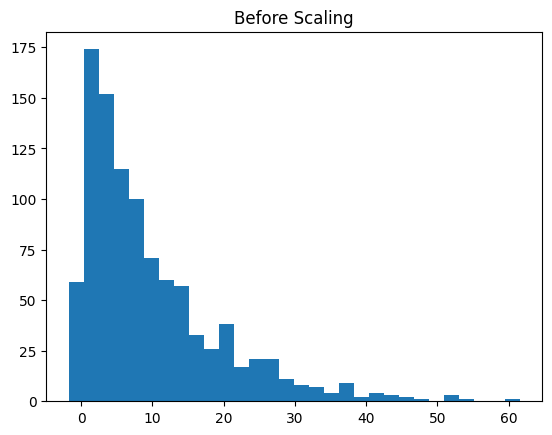

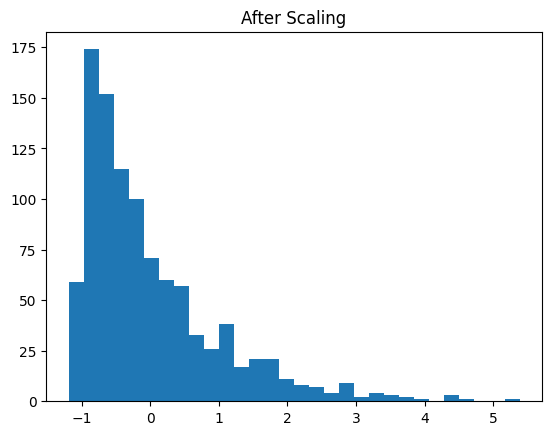

In [45]:
x = np.random.exponential(10,(1000)) + np.random.normal(0,1,(1000))
plt.hist((x),30) 
plt.title("Before Scaling")
plt.show()
plt.hist((x-np.mean(x))/np.std(x),bins=30)
plt.title("After Scaling")
plt.show()

The values are scaled but the outliers are still unchanged that is a drawback of the standard scaler . The standard scaler normalize the data in the following way : 
x --> (x - mean(x))/std(x)

Now we will use quantiles to deal with outliers

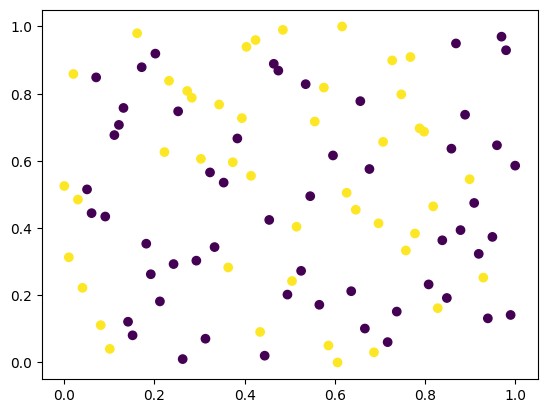

In [46]:
from sklearn.preprocessing import QuantileTransformer
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:,0],X_new[:,1],c=Y)

#### MinMax Scaler

The min max scaler uses the formula  
x ---> (x - x_min)/(x_max - x_min)        
>Result : Thus it Scales features to a [0,1] range

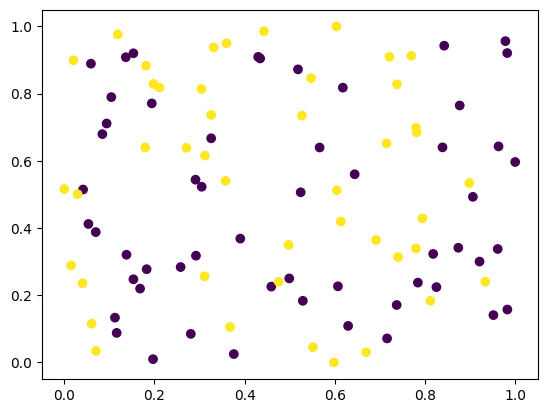

In [47]:
from sklearn.preprocessing import MinMaxScaler
X_new = MinMaxScaler().fit_transform(X)
plt.scatter(X_new[:,0],X_new[:,1],c=Y)

#### Non Linearly Separable Dataset

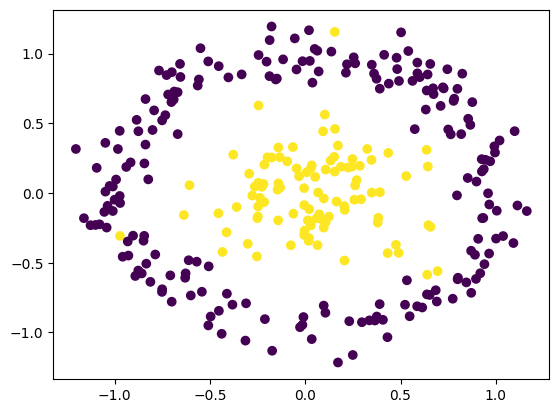

In [48]:
df = pd.read_csv('drawndata2.csv')
X = df[['x','y']].values
Y = df['z'] == 'a'
plt.scatter(X[:,0],X[:,1],c=Y)

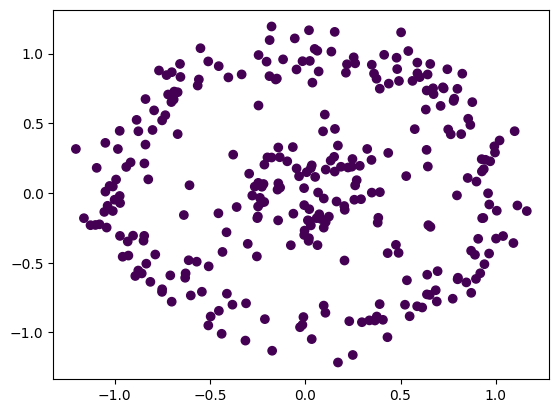

In [49]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([("scale",QuantileTransformer(n_quantiles=100)),("model",LogisticRegression())])
pred = pipe.fit(X,Y).predict(X)
plt.scatter(X[:,0],X[:,1],c=pred)

Here you can see that the Logistic Regression has performed very poorly. Infact, it has classified everything into one class, which is undesirable 

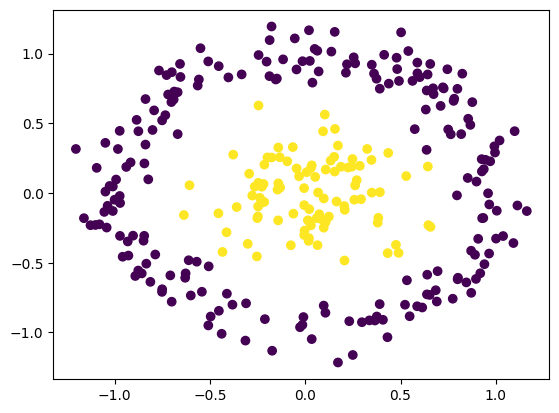

In [50]:
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([('scale',PolynomialFeatures()),('model',LogisticRegression())])
pred = pipe.fit(X,Y).predict(X)
plt.scatter(X[:,0],X[:,1],c=pred)

This is a nearly perfect classification using the polynomial features in logistic regression. But we are predicting on the training set itself which is a cheating but it surely performs better than the Logistic Regression with linear features and Quantile Transformer

#### Preprocessing to convert text data into numeric data

In [51]:
arr = np.array(["low","low","high","medium"]).reshape(-1,1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [52]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [53]:
enc.transform([['zero']]) # not in the data

array([[0., 0., 0.]])

## Metrics

In [54]:
from sklearn.metrics import precision_score,recall_score,make_scorer,classification_report,confusion_matrix
data = pd.read_csv('creditcard.csv')[:80000] # reading first 80000 rows only
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [55]:
X = data.drop(columns=['Time','Amount','Class']).values
Y = data['Class'].values
f"Shapes of X={X.shape},Y={Y.shape}, #Fraud Cases={Y.sum()}"

'Shapes of X=(80000, 28),Y=(80000,), #Fraud Cases=196'

In [56]:
model = LogisticRegression(max_iter=1000)
print("Number of fraud cases predict before changing class weights:",model.fit(X,Y).predict(X).sum())
model = LogisticRegression(class_weight={0:1,1:2},max_iter=1000)
print("Number of fraud cases predict after changing class weights:",model.fit(X,Y).predict(X).sum())

Number of fraud cases predict before changing class weights: 151
Number of fraud cases predict after changing class weights: 172


Model predict less number of fraud than the actual number of fraud cases.

By applying the changes in class weight we are able to detect more number of fraud cases hence we can do grid search on this parameter

In [57]:
grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                    param_grid={'class_weight':[{0:1,1:v} for v in range(1,4)]}, # List comprehension is used to iteratively increase the weight given to the fraud class
                    scoring={'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score)}, # specify the metrics used
                    cv=4,
                    n_jobs=-1,
                    refit='precision',
                    return_train_score=True) # to tell grid search which metric to optimize in case of multi metric scoring

grid.fit(X,Y)


GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [58]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,mean_train_recall,std_train_recall
0,0.565312,0.085500,0.021604,0.006975,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.015071,1.0,0.975610,0.875000,...,0.142857,0.566327,0.342825,3,0.863946,0.585034,0.510204,0.687075,0.661565,0.132642
1,0.564584,0.071833,0.022181,0.007618,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.013090,1.0,0.977273,0.857143,...,0.244898,0.612245,0.320415,2,0.870748,0.666667,0.625850,0.782313,0.736395,0.096490
2,0.564932,0.066411,0.018169,0.006527,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.008179,1.0,0.955556,0.800000,...,0.326531,0.637755,0.293401,1,0.870748,0.707483,0.680272,0.816327,0.768707,0.077861


In [59]:
print("Precision : ",precision_score(Y,grid.predict(X))) # params are the true value and the predicted value
print("Recall : ",recall_score(Y,grid.predict(X)))

Precision :  0.7814569536423841
Recall :  0.6020408163265306


Since we know that our grid search is running correct we will now increase the number of cross validations and number of values of the parameter class weights to check for

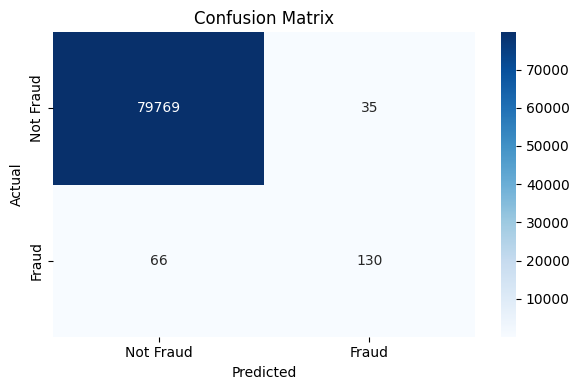

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79804
           1       0.79      0.66      0.72       196

    accuracy                           1.00     80000
   macro avg       0.89      0.83      0.86     80000
weighted avg       1.00      1.00      1.00     80000



In [60]:
grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                    param_grid={'class_weight':[{0:1,1:v} for v in np.linspace(1,20,30)]},
                    scoring = {'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score)},
                    cv = 10,
                    refit='precision',
                    return_train_score=True,
                    n_jobs=-1)

grid.fit(X,Y)
Y_pred = grid.predict(X)
cm = confusion_matrix(Y,Y_pred)
labels = ['Not Fraud','Fraud']
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print(classification_report(Y,Y_pred))


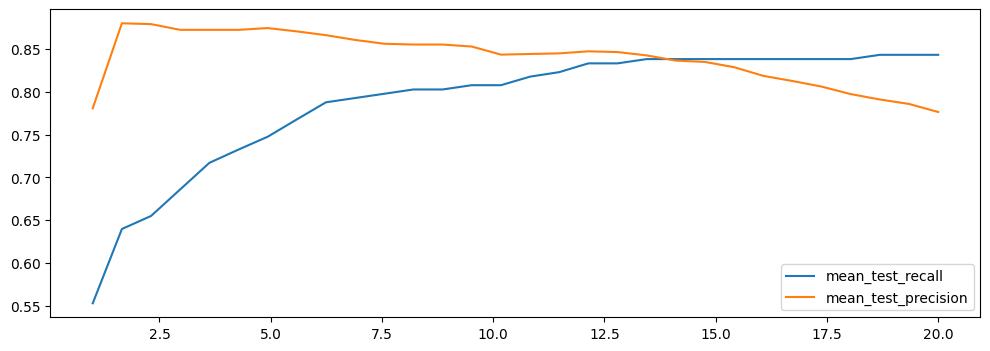

In [61]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall','mean_test_precision']:
    plt.plot([v[1] for v in df['param_class_weight']],df[score],label=score)
plt.legend(loc='lower right')

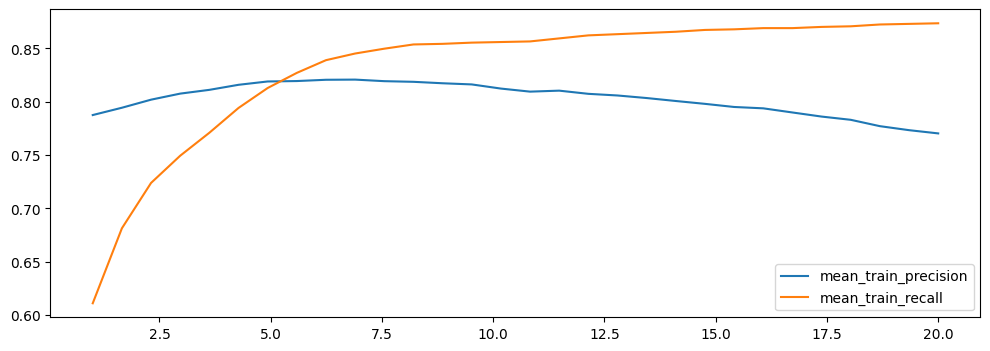

In [62]:
plt.figure(figsize=(12,4))
for score in ['mean_train_precision','mean_train_recall']:
    plt.plot([v[1] for v in df['param_class_weight']],df[score],label=score)
plt.legend(loc='lower right')

##### Designing own metric

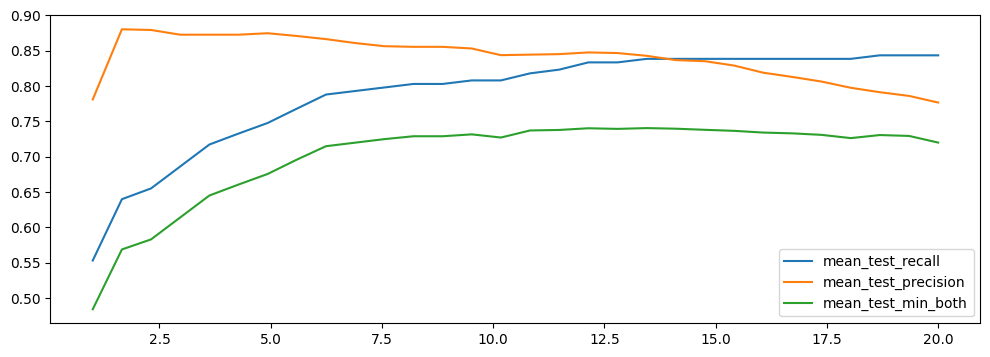

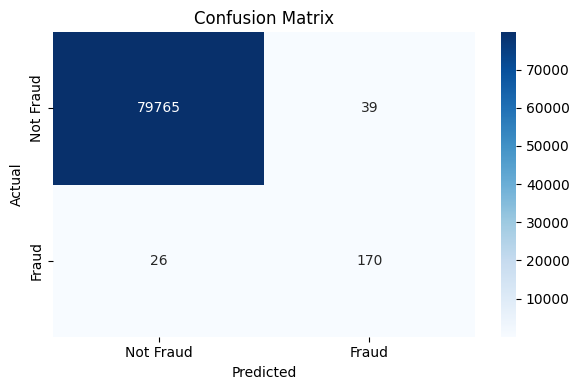

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79804
           1       0.81      0.87      0.84       196

    accuracy                           1.00     80000
   macro avg       0.91      0.93      0.92     80000
weighted avg       1.00      1.00      1.00     80000



In [63]:
# Sample weight can be passed to give more importance to some rows of the data
def min_recall_precision(est,X,y_true,sample_weight=None): # If we don't want to use make_scorer then we need to follow this signature
    y_pred = est.predict(X) 
    recall = recall_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    return min(precision,recall)

# Otherwise you can use the following signature in the comments
# def min_recall_precision(y_true,y_pred):
grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                    param_grid={'class_weight':[{0:1,1:v} for v in np.linspace(1,20,30)]},
                    scoring = {
                        'precision': make_scorer(precision_score), 
                        'recall': make_scorer(recall_score),
                        'min_both': min_recall_precision},
                    cv = 10,
                    refit='min_both',
                    return_train_score=True,
                    n_jobs=-1)

grid.fit(X,Y)  

plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall','mean_test_precision','mean_test_min_both']:
    plt.plot([v[1] for v in df['param_class_weight']],df[score],label=score)
plt.legend(loc='lower right')
Y_pred = grid.predict(X)
cm = confusion_matrix(Y,Y_pred)
labels = ['Not Fraud','Fraud']
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print(classification_report(Y,Y_pred))


##### Using Sample Weights while fitting the model

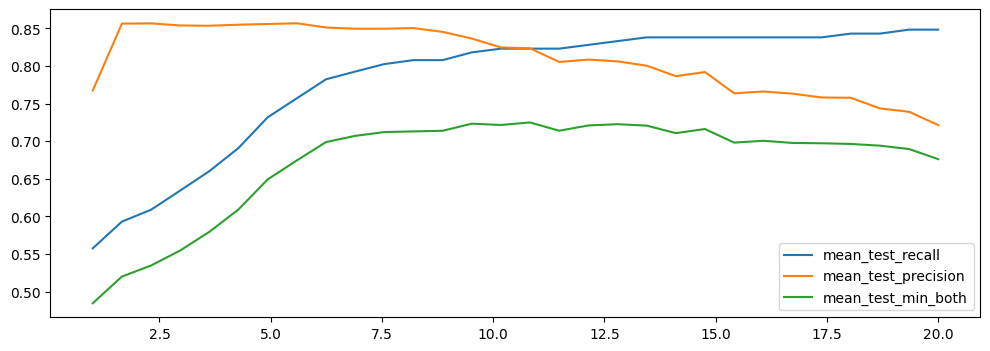

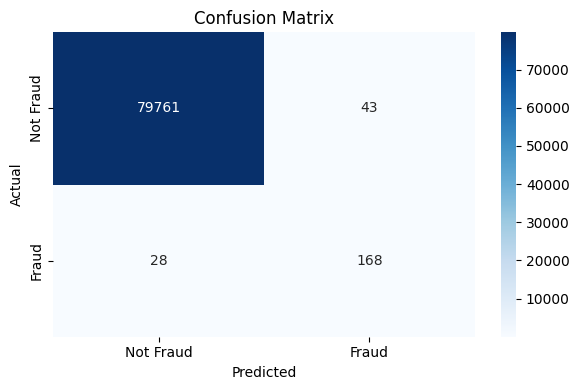

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79804
           1       0.80      0.86      0.83       196

    accuracy                           1.00     80000
   macro avg       0.90      0.93      0.91     80000
weighted avg       1.00      1.00      1.00     80000



In [64]:
# Sample weight can be passed to give more importance to some rows of the data
def min_recall_precision(est,X,y_true,sample_weight=None): # If we don't want to use make_scorer then we need to follow this signature
    y_pred = est.predict(X) 
    recall = recall_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    return min(precision,recall)

# Otherwise you can use the following signature in the comments
# def min_recall_precision(y_true,y_pred):
grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                    param_grid={'class_weight':[{0:1,1:v} for v in np.linspace(1,20,30)]},
                    scoring = {
                        'precision': make_scorer(precision_score), 
                        'recall': make_scorer(recall_score),
                        'min_both': min_recall_precision},
                    cv = 10,
                    refit='min_both',
                    return_train_score=True,
                    n_jobs=-1)

grid.fit(X,Y,sample_weight=np.log(1 + data['Amount']))  # giving importance to rows based on the transaction amount in the row

plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall','mean_test_precision','mean_test_min_both']:
    plt.plot([v[1] for v in df['param_class_weight']],df[score],label=score)
plt.legend(loc='lower right')
Y_pred = grid.predict(X)
cm = confusion_matrix(Y,Y_pred)
labels = ['Not Fraud','Fraud']
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print(classification_report(Y,Y_pred))



#### Outlier detection

In [65]:
## New precision and recall are required because the IsolationForest returns -1 for outlier and 1 otherwise but in our case we want the outlier(i.e. credit card fraud as 1 (outlier) and 0 otherwise)
def outlier_precision(model,X,Y):
    pred = model.predict(X)
    return precision_score(Y,np.where(pred==-1,1,0))

def outlier_recall(model,X,Y):
    pred = model.predict(X)
    return recall_score(Y,np.where(pred==-1,1,0))

from sklearn.ensemble import IsolationForest ## For outlier detection

grid = GridSearchCV(estimator=IsolationForest(),
                    param_grid={'contamination': np.linspace(0.001,0.02,10)},
                    scoring = {'precision' : outlier_precision,
                               'recall' : outlier_recall},
                    refit='precision',
                    cv=5,
                    n_jobs=-1)

grid.fit(X,Y)

GridSearchCV(cv=5, estimator=IsolationForest(), n_jobs=-1,
             param_grid={'contamination': array([0.001     , 0.00311111, 0.00522222, 0.00733333, 0.00944444,
       0.01155556, 0.01366667, 0.01577778, 0.01788889, 0.02      ])},
             refit='precision',
             scoring={'precision': <function outlier_precision at 0x000001EA87425440>,
                      'recall': <function outlier_recall at 0x000001EA74E83740>})

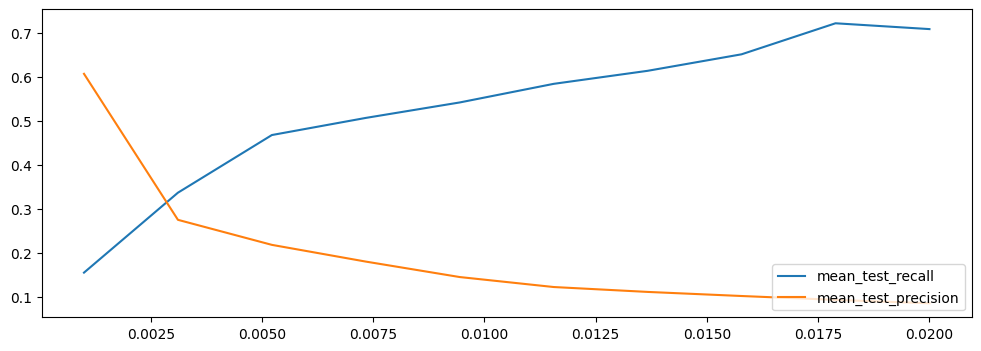

In [66]:
plt.figure(figsize=(12,4))
df_results = pd.DataFrame(grid.cv_results_)
contamination_values = df_results['param_contamination']
for score in ['mean_test_recall','mean_test_precision']:
    plt.plot(contamination_values,df_results[score],label=score)
plt.legend(loc='lower right')

#### Finding best Parameters for SVM using Grid Search

In [67]:
from sklearn.svm import SVC
grid = GridSearchCV(
    estimator= SVC(),
    param_grid= {'C':[0.1,1,10],'kernel':['linear','rbf']},
    cv = 5,
    n_jobs=-1
)
grid.fit(X,Y)
print("Best Parameters : ",grid.best_params_)
print("Best Score: ",grid.best_score_)

Best Parameters :  {'C': 0.1, 'kernel': 'rbf'}
Best Score:  0.9975875000000001


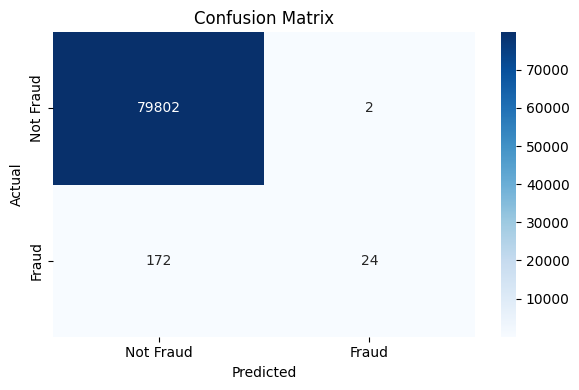

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79804
           1       0.92      0.12      0.22       196

    accuracy                           1.00     80000
   macro avg       0.96      0.56      0.61     80000
weighted avg       1.00      1.00      1.00     80000



In [68]:
Y_pred = grid.predict(X)
cm = confusion_matrix(Y,Y_pred)
labels = ['Not Fraud','Fraud']
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print(classification_report(Y,Y_pred))
